Paquetes necesarios

In [60]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

(800, 800, 3)


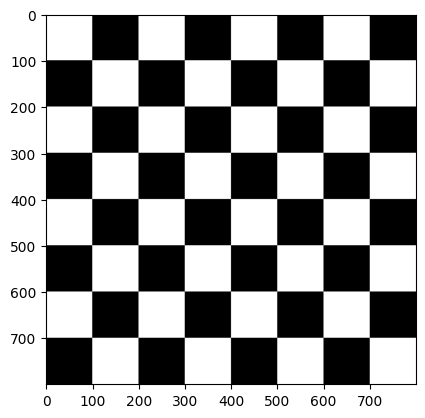

In [61]:
#Crea una imagen con tres planos
color_img = np.zeros((800,800,3), dtype = np.uint8)

#Parte nueva: crea un patrón de ajedrez pintando cuadrados blancos
for i in range(0, 8):
    for j in range(0, 8):
        if (i%2) == (j%2):
            color_img[100*i:100*(i+1), 100*j:100*(j+1)] = 255

#Dimensiones
print(color_img.shape)
#Visualiza con matplotlib (sin especificar el mapa de color gris)
plt.imshow(color_img) 
plt.show()


TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ ) con las funciones de dibujo de OpenCV

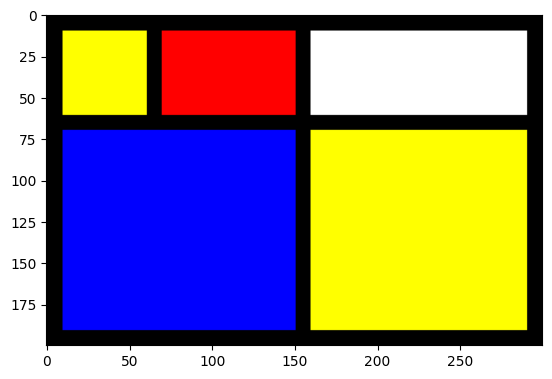

True

In [71]:
#Crea una imagen con tres planos
color_img = np.zeros((200,300,3), dtype = np.uint8)

cv2.rectangle(color_img, (10, 10), (60, 60), (255, 255, 0), -1)
cv2.rectangle(color_img, (10, 70), (150, 190), (0, 0, 255), -1)
cv2.rectangle(color_img, (70, 10), (150, 60), (255, 0, 0), -1)
cv2.rectangle(color_img, (160, 10), (290, 60), (255, 255, 255), -1)
cv2.rectangle(color_img, (160, 70), (290, 190), (255, 255, 0), -1)




plt.imshow(color_img) 
plt.show()

#Salva la imagen resultante a disco
cv2.imwrite('imagen.jpg', color_img)

TAREA? Funciones de dibujo. OpenCV dispone de funciones específicas para dibujar formas básicas (más información https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html)

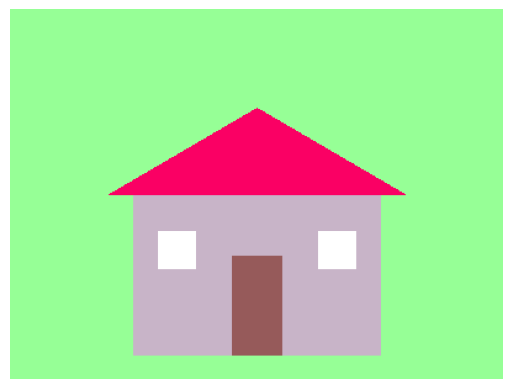

True

In [101]:
# Definiciones
alto = 300
ancho = 400

# Crea una imagen con tres planos (fondo celeste)
color_img = np.full((alto, ancho, 3), (150, 255, 150), dtype=np.uint8)

# --- Casa ---
# Paredes (rectángulo principal)
cv2.rectangle(color_img, (100, 150), (300, 280), (200, 180, 200), -1)

# Techo (triángulo/polígono)
pts_techo = np.array([[80,150],[200,80],[320,150]], np.int32)
pts_techo = pts_techo.reshape((-1,1,2))
cv2.fillPoly(color_img, [pts_techo], (100,0,250))

# Puerta
cv2.rectangle(color_img, (180, 200), (220, 280), (90, 90, 150), -1)

# Ventanas
cv2.rectangle(color_img, (120, 180), (150, 210), (255, 255, 255), -1)
cv2.rectangle(color_img, (250, 180), (280, 210), (255, 255, 255), -1)

# Visualiza
plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Guarda la imagen
cv2.imwrite('casa.jpg', color_img)

TAREA: Modifica de forma libre los valores de un plano de la imagen

In [116]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = 255-frame[:,:,1] # Canal verde invertido
        r = frame[:,:,2]
        #Dimensiones imagen de entrada
        h, w, c = frame.shape

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, g, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [119]:
vid = cv2.VideoCapture(0)

while True:      
    ret, frame = vid.read()
    if not ret:
        break
    
    # Pasamos a escala de grises para medir claridad
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Obtenemos posición del píxel más oscuro y más claro
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(gray)
    
    # Obtener color promedio BGR en esos píxeles
    min_color = frame[minLoc[1], minLoc[0]]  # frame[y, x]
    max_color = frame[maxLoc[1], maxLoc[0]]



    # Dibujamos círculos en esas posiciones
    cv2.circle(frame, minLoc, 10, (255, 255, 255), 2)  # blanco = más oscuro
    cv2.circle(frame, maxLoc, 10, (0, 0, 0), 2)  # negro = más claro
    
    # Mostrar texto con las 3 componentes BGR
    cv2.putText(frame, f"BGR: {int(min_color[0])},{int(min_color[1])},{int(min_color[2])}",
                (minLoc[0]-30, minLoc[1]+20), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (255, 255, 255), 1, cv2.LINE_AA)
    cv2.putText(frame, f"BGR: {int(max_color[0])},{int(max_color[1])},{int(max_color[2])}",
                (maxLoc[0]-30, maxLoc[1]+20), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (0, 0, 0), 1, cv2.LINE_AA)


    # Mostramos
    cv2.imshow("Claro/Oscuro", frame)
    
    # Salida con ESC
    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()


In [120]:
vid = cv2.VideoCapture(0)

while True:
    ret, frame = vid.read()
    if not ret:
        break

    h, w = frame.shape[:2]
    if h < 8 or w < 8:
        cv2.imshow("8x8 color", frame)
        if cv2.waitKey(20) == 27:
            break
        continue

    # Promediar en bloques 8x8 para cada canal
    avg = cv2.blur(frame, (8, 8))  # devuelve BGR promedio en cada bloque

    # Encontrar el más claro y el más oscuro usando luminosidad (convertimos a gris)
    gray_avg = cv2.cvtColor(avg, cv2.COLOR_BGR2GRAY)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_avg)

    # Centro aproximado del bloque
    min_center = (min_loc[0] + 4, min_loc[1] + 4)
    max_center = (max_loc[0] + 4, max_loc[1] + 4)

    # Obtener color promedio BGR en esos bloques
    min_color = avg[min_center[1], min_center[0]]  # formato [B, G, R]
    max_color = avg[max_center[1], max_center[0]]

    # Dibujar círculos
    cv2.circle(frame, min_center, 10, (255, 255, 255), 2)
    cv2.circle(frame, max_center, 10, (0, 0, 0), 2)

    # Mostrar texto con las 3 componentes BGR
    cv2.putText(frame, f"BGR: {int(min_color[0])},{int(min_color[1])},{int(min_color[2])}",
                (min_center[0]-30, min_center[1]+20), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (255, 255, 255), 1, cv2.LINE_AA)
    cv2.putText(frame, f"BGR: {int(max_color[0])},{int(max_color[1])},{int(max_color[2])}",
                (max_center[0]-30, max_center[1]+20), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (0, 0, 0), 1, cv2.LINE_AA)

    cv2.imshow("8x8 color", frame)

    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()


TAREA: Llevar a cabo una propuesta propia de pop art

In [121]:
# Abrir cámara
vid = cv2.VideoCapture(0)

# Dimensiones originales
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Reducimos a la mitad
w = int(w / 2)
h = int(h / 2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

# Imagen conjunta (3x3 cuadrantes)
collage = np.zeros((h * 3, w * 3, 3), dtype=np.uint8)

while True:
    ret, frameIN = vid.read()
    if not ret:
        break

    # Redimensionamos el frame
    frame = cv2.resize(frameIN, (w, h), interpolation=cv2.INTER_NEAREST)

    # Generamos distintas versiones del frame modificando canales
    mods = [ 
        cv2.merge([frame[:,:,0], np.zeros_like(frame[:,:,1]), np.zeros_like(frame[:,:,2])]),            # solo azul
        cv2.merge([frame[:,:,0], 255-frame[:,:,1], 255-frame[:,:,2]]),                                  # verde y rojo invertidos, azul normal
        cv2.merge([np.zeros_like(frame[:,:,0]), frame[:,:,1], frame[:,:,2]]),                           # sin azul
        cv2.merge([frame[:,:,0], frame[:,:,1], np.zeros_like(frame[:,:,2])]),                           # sin rojo
        cv2.merge([np.zeros_like(frame[:,:,0]), np.zeros_like(frame[:,:,1]), frame[:,:,2]]),            # solo rojo
        cv2.merge([255-frame[:,:,0], 255-frame[:,:,1], frame[:,:,2]]),                                  # azul y verde invertidos, rojo normal *
        cv2.merge([255-frame[:,:,0], frame[:,:,1], 255-frame[:,:,2]]),                                  # azul y rojo invertidos, verde normal *
        cv2.merge([frame[:,:,0], np.zeros_like(frame[:,:,1]), frame[:,:,2]]),                           # sin verde
        cv2.merge([np.zeros_like(frame[:,:,0]), frame[:,:,1], np.zeros_like(frame[:,:,2])]),            # solo verde

    ]

    # Colocar cada versión en el collage 3x3
    idx = 0
    for i in range(3):          # filas
        for j in range(3):      # columnas
            collage[i*h:(i+1)*h, j*w:(j+1)*w, :] = mods[idx]
            idx += 1

    # Mostrar collage
    cv2.imshow('Cam', collage)

    # Salir con ESC
    if cv2.waitKey(20) == 27:
        break

# Liberar cámara y cerrar ventanas
vid.release()
cv2.destroyAllWindows()
